In [1]:
import pandas

In [2]:
df = pandas.read_excel("/content/Assignment 2_BUSI 651_House Prices.xls")

In [3]:
y = df ["SalePrice"]

In [4]:
x = df[["GarageCars", "GarageArea", "OverallQual", "GrLivArea"]]

In [5]:
y_train = y[0:1167]
y_test = y[1167:]

x_train = x[0:1167]
x_test = x[1167:]

In [6]:
from keras.models import Sequential

from keras.layers import Dense, Activation

In [7]:
bmodel = Sequential()

In [8]:
bmodel.add ( Dense (32, activation = "relu", input_dim = 4)  )

In [9]:
bmodel.add ( Dense (32, activation = "relu" ) )

In [10]:
bmodel.add ( Dense (1) )

In [11]:
bmodel.compile (optimizer = "adam", loss = "mean_squared_error")

In [12]:
bmodel.fit(x_train, y_train, epochs = 15000)

Streaming output truncated to the last 5000 lines.
37/37 [==============================] - 0s 2ms/step - loss: 1190766592.0000
Epoch 12502/15000
37/37 [==============================] - 0s 2ms/step - loss: 1180407296.0000
Epoch 12503/15000
37/37 [==============================] - 0s 2ms/step - loss: 1229933312.0000
Epoch 12504/15000
37/37 [==============================] - 0s 2ms/step - loss: 1166577792.0000
Epoch 12505/15000
37/37 [==============================] - 0s 2ms/step - loss: 1215387520.0000
Epoch 12506/15000
37/37 [==============================] - 0s 2ms/step - loss: 1193771264.0000
Epoch 12507/15000
37/37 [==============================] - 0s 2ms/step - loss: 1185262720.0000
Epoch 12508/15000
37/37 [==============================] - 0s 1ms/step - loss: 1204171648.0000
Epoch 12509/15000
37/37 [==============================] - 0s 2ms/step - loss: 1162964864.0000
Epoch 12510/15000
37/37 [==============================] - 0s 2ms/step - loss: 1166292224.0000
Epoch 12511/15000

In [13]:
bmodel.predict([[2, 600, 7, 2200]])

1/1 [==============================] - 0s 97ms/step


array([[235481.5]], dtype=float32)

In [14]:
x_test

,GarageCars,GarageArea,OverallQual,GrLivArea
1167,2,472,6,1671
1168,3,540,6,2108
1169,1,807,10,3627
1170,2,358,6,1118
1171,0,433,6,1261
...,...,...,...,...
1455,1,460,6,1647
1456,2,500,6,2073
1457,1,252,7,2340
1458,0,240,5,1078


In [15]:
y_test

1167    173000
1168    235000
1169    625000
1170    171000
1171    163000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 293, dtype: int64

In [16]:
y_pred = bmodel.predict (x_test)

10/10 [==============================] - 0s 1ms/step


In [17]:
import numpy

In [18]:
y_test1 = y_test.to_numpy()
y_pred1 = y_pred.reshape(1, 293)

In [19]:
numpy.subtract(y_test1, y_pred1)

array([[-3.68706250e+03,  4.15702812e+04,  1.44502719e+05,
         3.00683594e+04,  9.29234375e+03, -1.12250469e+04,
        -4.92114062e+03,  3.50201562e+04, -2.88568125e+04,
         1.51561562e+04, -1.49063594e+04,  2.89356406e+04,
        -1.39189844e+04, -4.09992188e+03,  1.69617984e+05,
         2.55869281e+05, -2.55833281e+04,  3.41131406e+04,
        -2.84480156e+04, -1.68934766e+04, -1.13978125e+03,
        -1.13554062e+04, -8.59521875e+03,  4.20755859e+04,
        -3.98893750e+04, -1.17584219e+04,  1.50289375e+04,
         1.64920625e+04,  1.26980625e+04, -1.11452344e+04,
        -3.23828125e+04,  5.47740625e+03,  2.34310469e+04,
         2.19713984e+04, -1.53987500e+04, -1.11042500e+04,
         2.10034688e+04,  1.50283281e+04,  2.43343125e+04,
        -9.04937500e+02,  1.86580938e+04, -5.17346875e+03,
         5.90797031e+04,  1.66746875e+03, -6.61289062e+04,
         3.10367188e+04,  4.13636406e+04,  1.49467422e+04,
         6.28871875e+03, -7.83217656e+04,  2.54224375e+0

In [20]:
APE = abs (numpy.subtract(y_test1, y_pred1))/y_test1 * 100

In [21]:
APE.mean()

15.254578479091409

In [22]:
df["GarageCars"].mean()

1.4835616438356165

In [23]:
df["GarageArea"].mean()

472.9801369863014

In [24]:
df["OverallQual"].mean()

6.0993150684931505

In [25]:
df["GrLivArea"].mean()

1515.463698630137

In [26]:
bmodel.predict([[1.48, 600, 7, 2200]])

1/1 [==============================] - 0s 69ms/step


array([[236243.8]], dtype=float32)

In [27]:
bmodel.predict([[2, 472.98, 7, 2200]])

1/1 [==============================] - 0s 47ms/step


array([[228363.25]], dtype=float32)

In [28]:
bmodel.predict([[2, 600, 6.09, 2200]])

1/1 [==============================] - 0s 43ms/step


array([[204791.89]], dtype=float32)

In [29]:
bmodel.predict([[2, 600, 7, 1515.46]])

1/1 [==============================] - 0s 45ms/step


array([[208299.53]], dtype=float32)

Keeping GrLivArea Variable and other pararmeter as an fixed mean value predicting the price:

In [ ]:
#bmodel.predict([[1.48, 472.9, 6.09, ....]])
grLivArea = df[[ "GrLivArea"]]
datagrLivArea = grLivArea[1167:]
datagrLivAreaArr= datagrLivArea.to_numpy()
testValueOfgrLivArea = datagrLivAreaArr.reshape(1,293).flatten().tolist()
PredictedValue = []
for element in testValueOfgrLivArea:
    predVal= bmodel.predict([[1.48, 472.9, 6.09, element]])
    PredictedValue.append(predVal)






In [105]:
PredictedValue_list = [item[0][0] for item in PredictedValue]

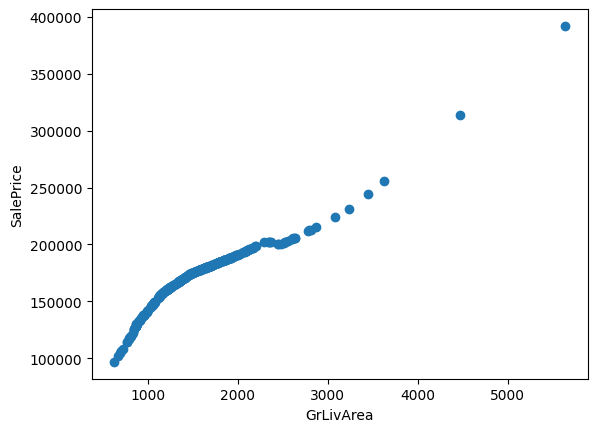

In [110]:
import matplotlib.pyplot as plt
x = testValueOfgrLivArea
y = PredictedValue_list
labels = testValueOfgrLivArea
plt.scatter(x, y)
#plt.xlim(850, 2300)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

Keeping OverallQual Variable and other pararmeter as an fixed mean value predicting the price:

In [ ]:

overallQual = df[[ "OverallQual"]]
dataoverallQual = overallQual[1167:]
dataoverallQualArr= dataoverallQual.to_numpy()
testValueOfoverallQual = dataoverallQualArr.reshape(1,293).flatten().tolist()
qualPredictedValue = []
for element in testValueOfoverallQual:
    qualPredVal= bmodel.predict([[1.48, 472.9, element,1515.46]])
    qualPredictedValue.append(predVal)

qualPredictedValue_list = [item[0][0] for item in qualPredictedValue]




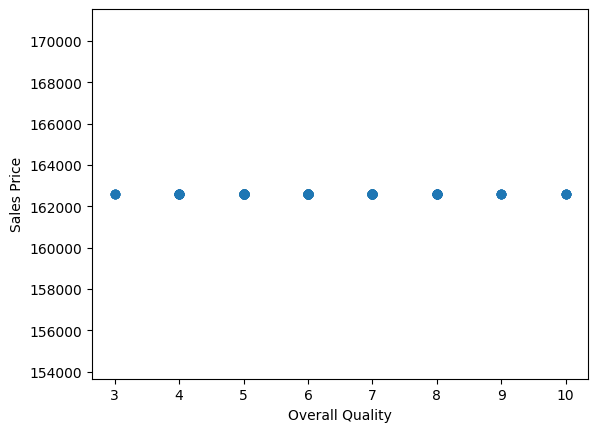

In [127]:
x = testValueOfoverallQual
y = qualPredictedValue_list
labels = testValueOfoverallQual
plt.scatter(x, y)
#plt.xlim(850, 2300)
plt.xlabel("Overall Quality")
plt.ylabel("Sales Price")
plt.show()

In [ ]:
garageArea = df[[ "GarageArea"]]
datagarageArea = garageArea[1167:]
datagarageAreaArr= datagarageArea.to_numpy()
testValueOfgarageArea = datagarageAreaArr.reshape(1,293).flatten().tolist()
garageAreaPredictedValue = []
for element in testValueOfgarageArea:
    garageAreaPredVal= bmodel.predict([[1.48, element ,6.09,1515.46]])
    garageAreaPredictedValue.append(predVal)

garageAreaPredictedValue_list = [item[0][0] for item in garageAreaPredictedValue]




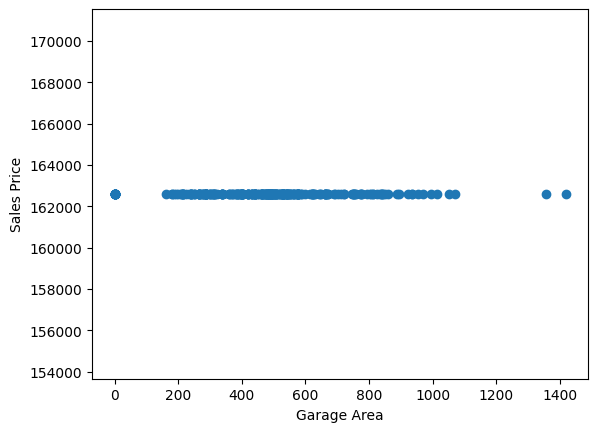

In [125]:
x = testValueOfgarageArea
y = garageAreaPredictedValue_list
labels = testValueOfoverallQual
plt.scatter(x, y)
#plt.xlim(850, 2300)
plt.xlabel("Garage Area")
plt.ylabel("Sales Price")
plt.show()

In [ ]:
garageCars = df[[ "GarageCars"]]
datagarageCars = garageCars[1167:]
datagarageCarsArr= datagarageCars.to_numpy()
testValueOfgarageCars = datagarageCarsArr.reshape(1,293).flatten().tolist()
garageCarsPredictedValue = []
for element in testValueOfgarageCars:
    garagecarsPredVal= bmodel.predict([[1.48, element ,6.09,1515.46]])
    garageCarsPredictedValue.append(predVal)

garageCarsPredictedValue_list = [item[0][0] for item in garageCarsPredictedValue]

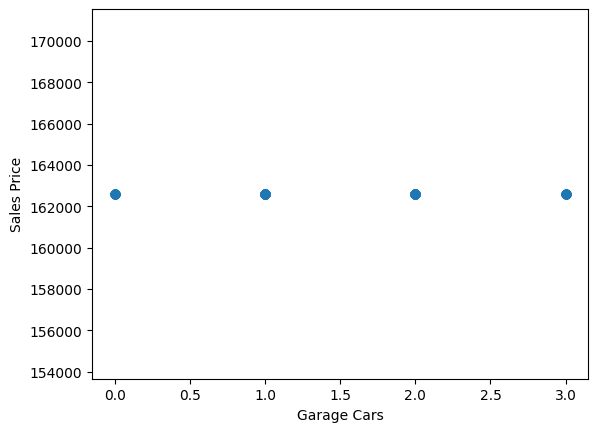

In [126]:
x = testValueOfgarageCars
y = garageCarsPredictedValue_list
labels = testValueOfgarageCars
plt.scatter(x, y)
#plt.xlim(850, 2300)
plt.xlabel("Garage Cars")
plt.ylabel("Sales Price")
plt.show()